In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.spatial import ConvexHull

In [2]:
# Generate x values from 0 to 2*pi
x = np.linspace(0, 2*np.pi, 100)

# Calculate y values for cosine functions
original_cos = np.cos(x)
original_sin = np.sin(x)

cont_cos_x = np.cos(x)+ np.cos(2*x)+ np.cos(3*x)
odd_cos_x = np.cos(x)+ np.cos(3*x)+ np.cos(5*x)
even_cos_x = np.cos(x) + np.cos(2*x) +np.cos(4 * x)
##changed coefficients
cont_cos_x_coff = 0.5 * np.cos(x)+ 0.3 * np.cos(2*x)+ 0.2 * np.cos(3*x)
odd_cos_x_coff = 0.5 * np.cos(x)+ 0.3 * np.cos(3*x)+ 0.2 * np.cos(5*x)
even_cos_x_coff = 0.5 * np.cos(x) + 0.3 * np.cos(2*x) + 0.2 * np.cos(4 * x)

#f plots
cont_cos_x_f = -np.sin(x) - 2* np.sin(2 * x) - 3 *np.sin(3 *x) - 4 *np.cos(2*x)- 9* np.cos(3*x)+2 *np.cos(2 *x) + 2*np.cos(3 *x)
odd_cos_x_f = -np.sin(x) - 3*np.sin(3*x) - 5*np.sin(5*x) - 9*np.cos(3*x) - 25*np.cos(5*x) +np.cos(x) + np.cos(3*x) + np.cos(5*x)
even_cos_x_f =np.cos(2*x) + np.cos(4*x)-np.sin(x) - 2*np.sin(2*x) - 4*np.sin(4*x)- 4*np.cos(2*x) - 16*np.cos(4*x)
##changed coefficients
cont_cos_x_coff_f = 0.3*np.cos(2*x) + 0.2*np.cos(3*x)-0.5*np.sin(x) - 0.6*np.sin(2*x) - 0.6*np.sin(3*x)- 1.2*np.cos(2*x) - 1.8*np.cos(3*x)
odd_cos_x_coff_f =  0.3*np.cos(3*x) + 0.2*np.cos(5*x)-0.5*np.sin(x) - 0.9*np.sin(3*x) - 1*np.sin(5*x)- 2.7*np.cos(3*x) - 5*np.cos(5*x)
even_cos_x_coff_f = 0.3 * np.cos(2*x) + 0.2 * np.cos(4*x)-0.5 * np.sin(x) - 0.6 * np.sin(2*x) - 0.8 * np.sin(4*x) - 1.2 * np.cos(2*x) - 3.2 * np.cos(4*x)

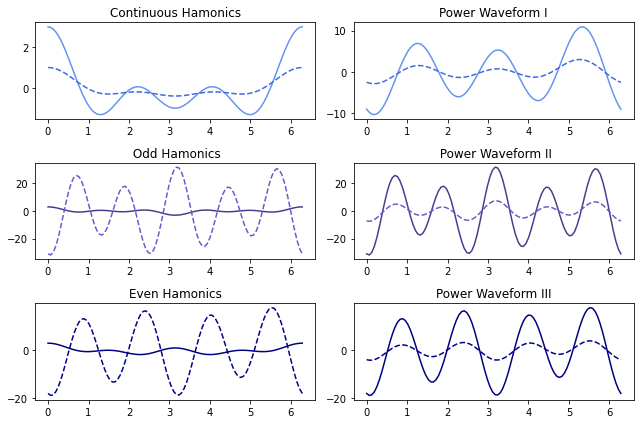

In [43]:
# Create a figure with 4x3 subplots
fig, axs = plt.subplots(3, 2, figsize=(9, 6))

# Plot harmonic functions
axs[0, 0].plot(x, cont_cos_x, linestyle='-', color='cornflowerblue')
axs[0, 0].set_title(' Continuous Hamonics')
axs[1, 0].plot(x, odd_cos_x, linestyle='-', color='darkslateblue')
axs[1, 0].set_title('Odd Hamonics')
axs[2, 0].plot(x, even_cos_x, linestyle='-', color='navy')
axs[2, 0].set_title('Even Hamonics')

# Plot harmonic_coff functions
axs[0, 0].plot(x, cont_cos_x_coff, linestyle='--', color='royalblue')
axs[0, 0].set_title('Continuous Hamonics')
axs[1, 0].plot(x, odd_cos_x_f, linestyle='--', color='slateblue')
axs[1, 0].set_title(' Odd Hamonics')
axs[2, 0].plot(x, even_cos_x_f, linestyle='--', color='darkblue')
axs[2, 0].set_title('Even Hamonics')

# Plot power functions
axs[0, 1].plot(x, cont_cos_x_f, linestyle='-', color='cornflowerblue')
axs[0, 1].set_title('Power Waveform I')
axs[1, 1].plot(x, odd_cos_x_f, linestyle='-', color='darkslateblue')
axs[1, 1].set_title('Power Waveform II')
axs[2, 1].plot(x, even_cos_x_f, linestyle='-', color='navy')
axs[2, 1].set_title('Power Waveform III')

# Plot power_coff functions
axs[0, 1].plot(x, cont_cos_x_coff_f, linestyle='--', color='royalblue')
axs[0, 1].set_title('Power Waveform I')
axs[1, 1].plot(x, odd_cos_x_coff_f, linestyle='--', color='slateblue')
axs[1, 1].set_title(' Power Waveform II')
axs[2, 1].plot(x, even_cos_x_coff_f, linestyle='--', color='darkblue')
axs[2, 1].set_title('Power Waveform III')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('Basic Harmonics.png')
plt.show()


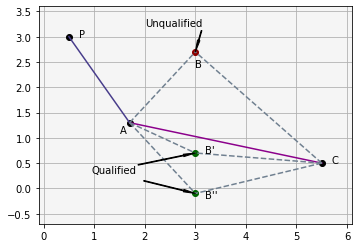

Point B is on the right side of line AC.


In [4]:
def plot_points_and_line(A, B, C, P,B_star1,Bstar2):
    # Unpack the coordinates
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C
    x4, y4 = P
    x5, y5 = B_star1
    x6, y6 = B_star2
    
    # Plot the points
    plt.rcParams['axes.facecolor'] = 'whitesmoke'
    plt.plot(x1, y1, 'black',marker = 'o')  # A
    plt.plot(x2, y2, 'darkred',marker = 'o')  # B
    plt.plot(x3, y3, 'black',marker = 'o')  # C
    plt.plot(x4, y4, 'black',marker = 'o')  # P
    plt.plot(x5, y5, 'darkgreen',marker = 'o')  # B*
    plt.plot(x6, y6, 'darkgreen',marker = 'o')  # B**
    
    # Plot the line AC
    plt.plot([x1, x3], [y1, y3], 'darkmagenta')
    plt.plot([x4, x1], [y4, y1], 'darkslateblue')
    plt.plot([x1, x2], [y1, y2],linestyle = "--", color = 'slategray')
    plt.plot([x3, x2], [y3, y2],linestyle = "--", color = 'slategray')
    
    plt.plot([x1, x5], [y1, y5],linestyle = "--", color = 'slategray')
    plt.plot([x3, x5], [y3, y5],linestyle = "--", color = 'slategray')
    
    plt.plot([x1, x6], [y1, y6],linestyle = "--", color = 'slategray')
    plt.plot([x3, x6], [y3, y6],linestyle = "--", color = 'slategray')
    
    #add text
    plt.text(x1-0.2, y1-0.2, "A", fontsize=10)
    plt.text(x2, y2-0.3, "B", fontsize=10)
    plt.text(x3+0.2, y3, "C", fontsize=10)
    plt.text(x4+0.2, y4, "P", fontsize=10)
    plt.text(x5+0.2, y5, "B'", fontsize=10)
    plt.text(x6+0.2, y6-0.1, "B''", fontsize=10)
    
    plt.annotate('Unqualified', xy=(x2,y2), xytext=(x2-1, y2+0.5), arrowprops=dict(facecolor='k', headwidth=2.5, width=0.7))
    plt.annotate('Qualified', xy=(x5,y5), xytext=((x1+ min(x5,x6))/5 , (y5+ y6)/2), arrowprops=dict(facecolor='k',  headwidth=2.5, width=0.7))
    plt.annotate(' ', xy=(x6,y6), xytext=((x1+ x6)/2.5 , (y5+ y6)/2-0.1), arrowprops=dict(facecolor='k',  headwidth=2.5, width=0.7))
    # Set axis limits
    plt.xlim(min(x1, x2, x3, x4, x5, x6) - 0.6, max(x1, x2, x3, x4, x5, x6) + 0.6)
    plt.ylim(min(y1, y2, y3, y4, y5, y6) - 0.6, max(y1, y2, y3, y4, y5, y6) + 0.6)

    ## Add labels
    #plt.xlabel('X')
    #plt.ylabel('Y')

    # Show plot
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('smoother illustration.svg',format='svg',dpi=600)
    plt.show()

def is_point_on_right_side(A, B, C):
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C

    # Calculate the slope of line AC
    slope_AC = (y3 - y1) / (x3 - x1) if x3 != x1 else float('inf')
    slope_AB = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')
    
    # Determine the position of B relative to line AC
    if x2 > x1 and slope_AC < slope_AB:  # B is on the right side of AC if AC has positive slope
        return True
    else:
        return False

# Test data
A = (1.7, 1.3)
B = (3, 2.7)
C = (5.5, 0.5)
P = (0.5,3)
B_star1 = (3,0.7)
B_star2 = (3,0.-0.1)
# Plot points and line
plot_points_and_line(A, B, C, P, B_star1, B_star2)

# Check if B is on the right side of AC
if is_point_on_right_side(A, B, C):
    print("Point B is on the right side of line AC.")
else:
    print("Point B is on the left side of line AC.")


(3.6, 0.9)


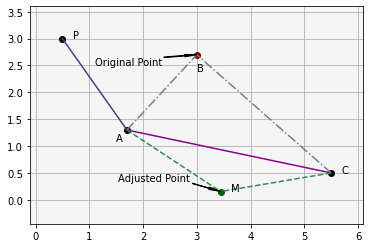

In [5]:
    
def mid_point(A,C):
    x1, y1 = A
    x3, y3 = C
    
    mid_point = (x1 + x3)/2, (y1 + y3)/2
    print(mid_point)
    return mid_point

def gradient(M,N):
    x1, y1 = M
    x2, y2 = N
    
    gradient = (y2 - y1)/(x2 - x1)
    return gradient

def angle_bisector_grad(A, C, P):
    x1, y1 = A
    x3, y3 = C
    x4, y4 = P
    a = gradient(P,A)
    b = gradient(A,C)
    
    grad_angle_bisector1 = (- np.sqrt(a*a + 1) - np.sqrt(b*b + 1))/(a *np.sqrt(b*b +1) +b *np.sqrt(a*a +1))
    grad_angle_bisector2 = (a *np.sqrt(b*b +1) +b *np.sqrt(a*a +1))/(np.sqrt(b*b +1) +np.sqrt(a*a +1))
    return min(grad_angle_bisector1,grad_angle_bisector2)

def vertical_bisector_grad(A,C):
    grad_vertical_bisector = -1/gradient(A,C)
    return grad_vertical_bisector

def M_coordinate_solver(A,mid_point_coor,grad_ang,grad_vert):
    x1, y1 = A
    x_mid, y_mid = mid_point_coor
    k_ang = grad_ang
    k_mid = grad_vert
    
    xm = (y_mid - y1 + k_ang *x1 - k_mid * x_mid)/(k_ang - k_mid)
    ym = k_ang * (xm - x1) +y1
    
    return xm,ym

def plot_points_and_line(A, B, C, P,M):
    # Unpack the coordinates
    x1, y1 = A
    x2, y2 = B
    x3, y3 = C
    x4, y4 = P
    x5, y5 = M
    
    # Plot the points
    plt.rcParams['axes.facecolor'] = 'whitesmoke'
    plt.plot(x1, y1, 'black',marker = 'o')  # A
    plt.plot(x2, y2, 'darkred',marker = 'o')  # B
    plt.plot(x3, y3, 'black',marker = 'o')  # C
    plt.plot(x4, y4, 'black',marker = 'o')  # P
    plt.plot(x5, y5, 'darkgreen',marker = 'o')  # M
 
    # Plot the line AC
    plt.plot([x1, x3], [y1, y3], 'darkmagenta')
    plt.plot([x4, x1], [y4, y1], 'darkslateblue')
    plt.plot([x1, x2], [y1, y2],linestyle = "-.", color = 'slategray')
    plt.plot([x3, x2], [y3, y2],linestyle = "-.", color = 'slategray')
    
    plt.plot([x1, x5], [y1, y5],linestyle = "--", color = 'seagreen')
    plt.plot([x3, x5], [y3, y5],linestyle = "--", color = 'seagreen')
    
    #add text
    plt.text(x1-0.2, y1-0.2, "A", fontsize=10)
    plt.text(x2, y2-0.3, "B", fontsize=10)
    plt.text(x3+0.2, y3, "C", fontsize=10)
    plt.text(x4+0.2, y4, "P", fontsize=10)
    plt.text(x5+0.2, y5, "M", fontsize=10)
    
    plt.annotate('Original Point', xy=(x2,y2), xytext=(x2-1.9 , y2-0.2), arrowprops=dict(facecolor='k',  headwidth=2.5, width=0.7))
    plt.annotate('Adjusted Point', xy=(x5,y5), xytext=(x5-1.9, y5+0.2), arrowprops=dict(facecolor='k',headwidth=2.5, width=0.4))
    
    # Set axis limits
    plt.xlim(min(x1, x2, x3, x4, x5) - 0.6, max(x1, x2, x3, x4, x5) + 0.6)
    plt.ylim(min(y1, y2, y3, y4, y5) - 0.6, max(y1, y2, y3, y4, y5) + 0.6)

    ## Add labels
    #plt.xlabel('X')
    #plt.ylabel('Y')

    # Show plot
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.savefig('smoother illustration02.svg',format='svg',dpi=600)
    plt.show()
    
# Test data
A = (1.7, 1.3)
B = (3, 2.7)
C = (5.5, 0.5)
P = (0.5,3)

# Plot points and line
mid_point_coor = mid_point(A,C)
gradient_angle_bisector = angle_bisector_grad(A, C, P)
gradient_vertical_bisector = vertical_bisector_grad(A,C)
solution = M_coordinate_solver(A,mid_point_coor,gradient_angle_bisector,gradient_vertical_bisector)

plot_points_and_line(A, B, C, P, solution)

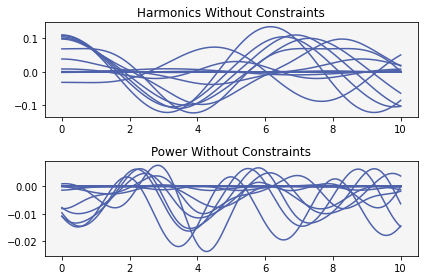

In [176]:
#Read Datafiles -- without constraints
df = pd.read_csv('./dataset/original_solutions_without constraints.csv')
#df
zeta = np.array(df.zeta)
omega = np.array(df.omega_ratio)
power = np.array(df.power)


a1 = np.array(df.solution_1)
a2 = np.array(df.solution_2)
a3 = np.array(df.solution_3)

t = np.linspace(0,9.999,1000)

index = np.linspace(0,399,20,dtype = int)

#new_power

#plot
plt.rcParams['axes.facecolor'] = 'whitesmoke'
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

for i in index:
    a1_test = a1[i]
    a2_test = a2[i]
    a3_test = a3[i]
    omega_test = omega[i]
    zeta_test = zeta[i]
    
    test_x = a1_test * np.cos(omega[i] * t) + a2_test * np.cos(2 * omega[i] * t) + a3_test * np.cos(3 * omega[i] * t)
    test_dx = - a1_test * omega[i] * np.sin(omega[i] * t) - 2 * a2_test * omega[i] * np.sin(2 * omega[i] * t) + 3 * a3_test * omega[i] * np.sin(3 * omega[i] * t)
    test_ddx = - (a1_test * np.cos(omega[i] * t) + 4 * a2_test * np.cos(2 * omega[i] * t) + 9 * a3_test * np.cos(3 * omega[i] * t)) * omega[i] * omega[i]
    test_f = test_ddx + 2 * zeta_test * test_dx + test_x * test_x
    test_p = test_f * test_x
    test_g = test_ddx + test_x * test_x
    test_Fs =  - 2 *zeta_test * test_dx   
    axs[0].plot(t, test_x, linestyle='-', color='#4E62AB')
    axs[1].plot(t, test_p, linestyle='-', color='#4E62AB')
    
axs[0].set_title('Harmonics Without Constraints')
axs[1].set_title('Power Without Constraints')

plt.tight_layout()


#Show plot
plt.savefig('Original Solutions Without Constraints.png')
plt.show()

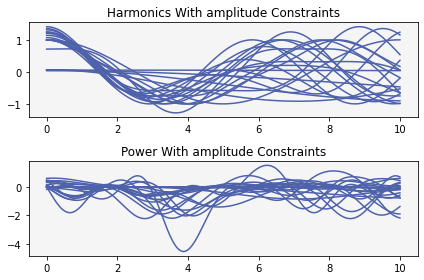

In [177]:
#Read Datafiles -- with amplitude constraints
df = pd.read_csv('./dataset/solutions_withamplitude_constraints.csv')
#df
zeta = np.array(df.zeta)
omega = np.array(df.omega_ratio)
power = np.array(df.power)


a1 = np.array(df.solution_1)
a2 = np.array(df.solution_2)
a3 = np.array(df.solution_3)

t = np.linspace(0,9.999,1000)

index = np.linspace(0,399,20,dtype = int)

#new_power

#plot
plt.rcParams['axes.facecolor'] = 'whitesmoke'
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

for i in index:
    a1_test = a1[i]
    a2_test = a2[i]
    a3_test = a3[i]
    omega_test = omega[i]
    zeta_test = zeta[i]
    
    test_x = a1_test * np.cos(omega[i] * t) + a2_test * np.cos(2 * omega[i] * t) + a3_test * np.cos(3 * omega[i] * t)
    test_dx = - a1_test * omega[i] * np.sin(omega[i] * t) - 2 * a2_test * omega[i] * np.sin(2 * omega[i] * t) + 3 * a3_test * omega[i] * np.sin(3 * omega[i] * t)
    test_ddx = - (a1_test * np.cos(omega[i] * t) + 4 * a2_test * np.cos(2 * omega[i] * t) + 9 * a3_test * np.cos(3 * omega[i] * t)) * omega[i] * omega[i]
    test_f = test_ddx + 2 * zeta_test * test_dx + test_x * test_x
    test_p = test_f * test_x
    test_g = test_ddx + test_x * test_x
    test_Fs =  - 2 *zeta_test * test_dx   
    axs[0].plot(t, test_x, linestyle='-', color='#4E62AB')
    axs[1].plot(t, test_p, linestyle='-', color='#4E62AB')
    
axs[0].set_title('Harmonics With amplitude Constraints')
axs[1].set_title('Power With amplitude Constraints')

plt.tight_layout()


#Show plot
plt.savefig('Solutions With amplitude Constraints.png')
plt.show()

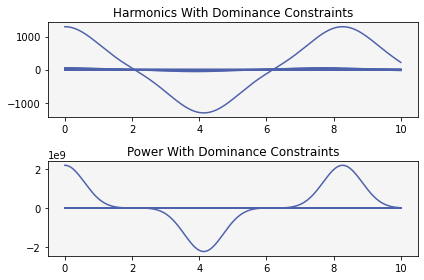

In [178]:
#Read Datafiles -- with dominance constraints
df = pd.read_csv('./dataset/solutions_withdominance_constraints.csv')
#df
zeta = np.array(df.zeta)
omega = np.array(df.omega_ratio)
power = np.array(df.power)


a1 = np.array(df.solution_1)
a2 = np.array(df.solution_2)
a3 = np.array(df.solution_3)

t = np.linspace(0,9.999,1000)

index = np.linspace(0,399,20,dtype = int)

#new_power

#plot
plt.rcParams['axes.facecolor'] = 'whitesmoke'
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

for i in index:
    a1_test = a1[i]
    a2_test = a2[i]
    a3_test = a3[i]
    omega_test = omega[i]
    zeta_test = zeta[i]
    
    test_x = a1_test * np.cos(omega[i] * t) + a2_test * np.cos(2 * omega[i] * t) + a3_test * np.cos(3 * omega[i] * t)
    test_dx = - a1_test * omega[i] * np.sin(omega[i] * t) - 2 * a2_test * omega[i] * np.sin(2 * omega[i] * t) + 3 * a3_test * omega[i] * np.sin(3 * omega[i] * t)
    test_ddx = - (a1_test * np.cos(omega[i] * t) + 4 * a2_test * np.cos(2 * omega[i] * t) + 9 * a3_test * np.cos(3 * omega[i] * t)) * omega[i] * omega[i]
    test_f = test_ddx + 2 * zeta_test * test_dx + test_x * test_x
    test_p = test_f * test_x
    test_g = test_ddx + test_x * test_x
    test_Fs =  - 2 *zeta_test * test_dx   
    axs[0].plot(t, test_x, linestyle='-', color='#4E62AB')
    axs[1].plot(t, test_p, linestyle='-', color='#4E62AB')
    
axs[0].set_title('Harmonics With Dominance Constraints')
axs[1].set_title('Power With Dominance Constraints')

plt.tight_layout()


#Show plot
plt.savefig('Solutions With dominance Constraints.png')
plt.show()

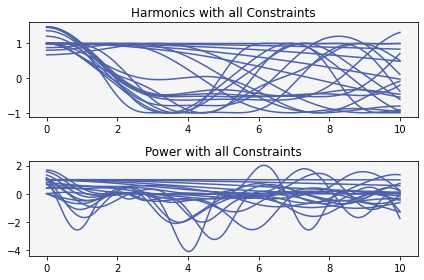

In [179]:
#Read Datafiles -- with dominance constraints
df = pd.read_csv('./dataset/solutions_full_constraints.csv')
#df
zeta = np.array(df.zeta)
omega = np.array(df.omega_ratio)
power = np.array(df.power)


a1 = np.array(df.solution_1)
a2 = np.array(df.solution_2)
a3 = np.array(df.solution_3)

t = np.linspace(0,9.999,1000)

index = np.linspace(0,399,20,dtype = int)

#new_power

#plot
plt.rcParams['axes.facecolor'] = 'whitesmoke'
fig, axs = plt.subplots(2, 1, figsize=(6, 4))

for i in index:
    a1_test = a1[i]
    a2_test = a2[i]
    a3_test = a3[i]
    omega_test = omega[i]
    zeta_test = zeta[i]
    
    test_x = a1_test * np.cos(omega[i] * t) + a2_test * np.cos(2 * omega[i] * t) + a3_test * np.cos(3 * omega[i] * t)
    test_dx = - a1_test * omega[i] * np.sin(omega[i] * t) - 2 * a2_test * omega[i] * np.sin(2 * omega[i] * t) + 3 * a3_test * omega[i] * np.sin(3 * omega[i] * t)
    test_ddx = - (a1_test * np.cos(omega[i] * t) + 4 * a2_test * np.cos(2 * omega[i] * t) + 9 * a3_test * np.cos(3 * omega[i] * t)) * omega[i] * omega[i]
    test_f = test_ddx + 2 * zeta_test * test_dx + test_x * test_x
    test_p = test_f * test_x
    test_g = test_ddx + test_x * test_x
    test_Fs =  - 2 *zeta_test * test_dx   
    axs[0].plot(t, test_x, linestyle='-', color='#4E62AB')
    axs[1].plot(t, test_p, linestyle='-', color='#4E62AB')
    
axs[0].set_title('Harmonics with all Constraints')
axs[1].set_title('Power with all Constraints')

plt.tight_layout()


#Show plot
plt.savefig('Solutions With all Constraints.png')
plt.show()